In [4]:
%matplotlib inline
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import keras

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [8]:
mnist = input_data.read_data_sets("mnist",one_hot=True)

Extracting mnist\train-images-idx3-ubyte.gz
Extracting mnist\train-labels-idx1-ubyte.gz
Extracting mnist\t10k-images-idx3-ubyte.gz
Extracting mnist\t10k-labels-idx1-ubyte.gz


0.1672854


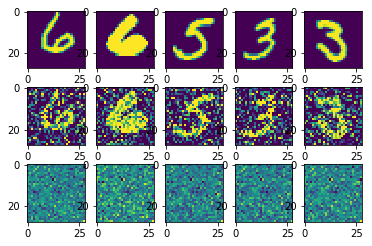

0.104654185


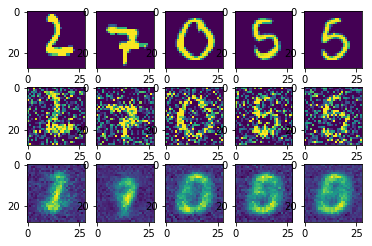

0.094286695


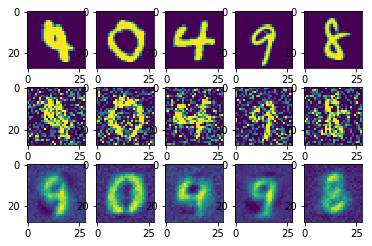

0.0884822


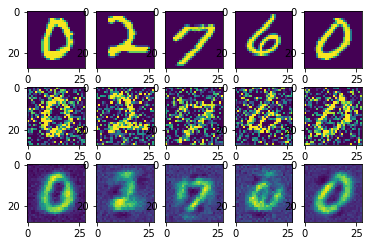

0.08945991


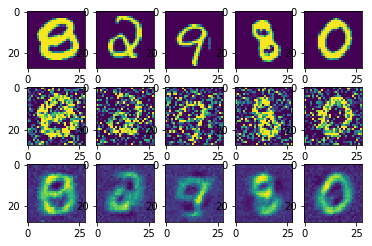

In [18]:
with tf.Graph().as_default() as g:
    inp_out = tf.placeholder(shape=[None,784],dtype=tf.float32)
    
    h1 = tf.keras.layers.Dense(128,activation=tf.nn.relu)(inp_out)
    h2 = tf.keras.layers.Dense(64,activation=tf.nn.relu)(h1)
    out = tf.keras.layers.Dense(784,activation=tf.nn.sigmoid)(h2)
    
    loss = tf.reduce_mean(tf.keras.losses.mean_squared_error(inp_out,out))
    
with tf.Session(graph=g) as sess:
    optim = tf.train.GradientDescentOptimizer(learning_rate=1.5)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    for i in range(10000):
        batch_img,_ = mnist.train.next_batch(32)
        
        #加入噪声
        noise_factor = 0.5
        batch_img_noise = batch_img + noise_factor*np.random.normal(loc=0.0,scale=1.0,size=batch_img.shape)
        batch_img_noise = np.clip(batch_img_noise,0.,1.)
        
        res_loss,_ = sess.run([loss,train_op],feed_dict={inp_out:batch_img_noise})
        if i % 2000 == 0:
            print(res_loss)
            batch_img,_ = mnist.test.next_batch(5)
            
            noise_factor = 0.5
            batch_img_noise = batch_img + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=batch_img.shape)
            batch_img_noise = np.clip(batch_img_noise, 0., 1.)
        
            res_out = sess.run(out,feed_dict={inp_out:batch_img_noise})
            
            for j in range(15):
                plt.subplot(3,5,j+1)
                if j<5:
                    img = batch_img[j]
                elif j<10:
                    img = batch_img_noise[j-5]
                else:
                    img = res_out[j-10]
                img = ((img*255).astype(np.uint8).reshape([28,28]))
                plt.imshow(img)
            plt.show()